In [558]:
import torch

import matplotlib.pyplot as plt

from torch import nn

In [559]:
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Torch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

Matplotlib version: 3.9.2
Torch version: 2.5.0+cu124
CUDA available: True
CUDA version: 12.4


# Data (preparing and loading)

In [560]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step)
y = weight * X + bias

In [561]:
X

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])

In [562]:
y

tensor([0.3000, 0.3070, 0.3140, 0.3210, 0.3280, 0.3350, 0.3420, 0.3490, 0.3560,
        0.3630, 0.3700, 0.3770, 0.3840, 0.3910, 0.3980, 0.4050, 0.4120, 0.4190,
        0.4260, 0.4330, 0.4400, 0.4470, 0.4540, 0.4610, 0.4680, 0.4750, 0.4820,
        0.4890, 0.4960, 0.5030, 0.5100, 0.5170, 0.5240, 0.5310, 0.5380, 0.5450,
        0.5520, 0.5590, 0.5660, 0.5730, 0.5800, 0.5870, 0.5940, 0.6010, 0.6080,
        0.6150, 0.6220, 0.6290, 0.6360, 0.6430, 0.6500, 0.6570, 0.6640, 0.6710,
        0.6780, 0.6850, 0.6920, 0.6990, 0.7060, 0.7130, 0.7200, 0.7270, 0.7340,
        0.7410, 0.7480, 0.7550, 0.7620, 0.7690, 0.7760, 0.7830, 0.7900, 0.7970,
        0.8040, 0.8110, 0.8180, 0.8250, 0.8320, 0.8390, 0.8460, 0.8530, 0.8600,
        0.8670, 0.8740, 0.8810, 0.8880, 0.8950, 0.9020, 0.9090, 0.9160, 0.9230,
        0.9300, 0.9370, 0.9440, 0.9510, 0.9580, 0.9650, 0.9720, 0.9790, 0.9860,
        0.9930])

### Splitting the data

In [563]:
train_size = int(0.8 * len(X))
validation_size = int(0.1 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_validation = X[train_size:train_size + validation_size]
y_validation = y[train_size:train_size + validation_size]

X_test = X[train_size + validation_size:]
y_test = y[train_size + validation_size:]

In [564]:
len(X_train), len(X_validation), len(X_test)

(80, 10, 10)

In [565]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    validation_data=X_validation,
    validation_labels=y_validation,
    predictions=None
):
    plt.figure(figsize=(12, 6))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Train data")
    plt.scatter(validation_data, validation_labels, c='g', s=4, label="Validation data")

    if predictions is not None:
        plt.scatter(validation_data, predictions, c='r', s=4, label="Predictions")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(prop={"size": 14})
    plt.show()

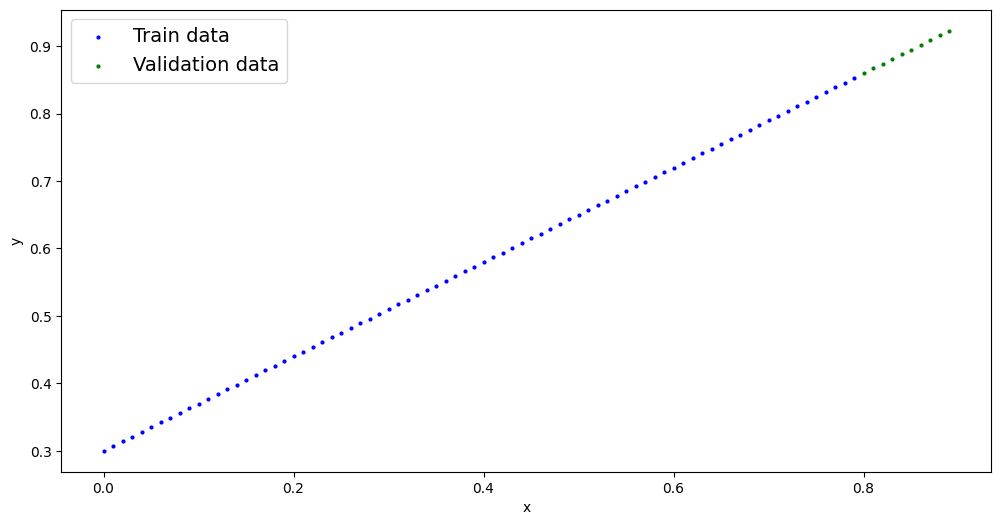

In [566]:
plot_predictions()

# Build Model

In [567]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()

        self.weights = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True,
                dtype=torch.float
            )
        )
        self.bias = nn.Parameter(
            torch.randn(
                1,
                requires_grad=True,
                dtype=torch.float
            )
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [568]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [569]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [570]:
weight, bias

(0.7, 0.3)

In [571]:
with torch.inference_mode(): # turn off gradient tracking
    y_preds = model_0(X_validation)

y_preds

tensor([0.3982, 0.4015, 0.4049, 0.4083, 0.4116, 0.4150, 0.4184, 0.4217, 0.4251,
        0.4285])

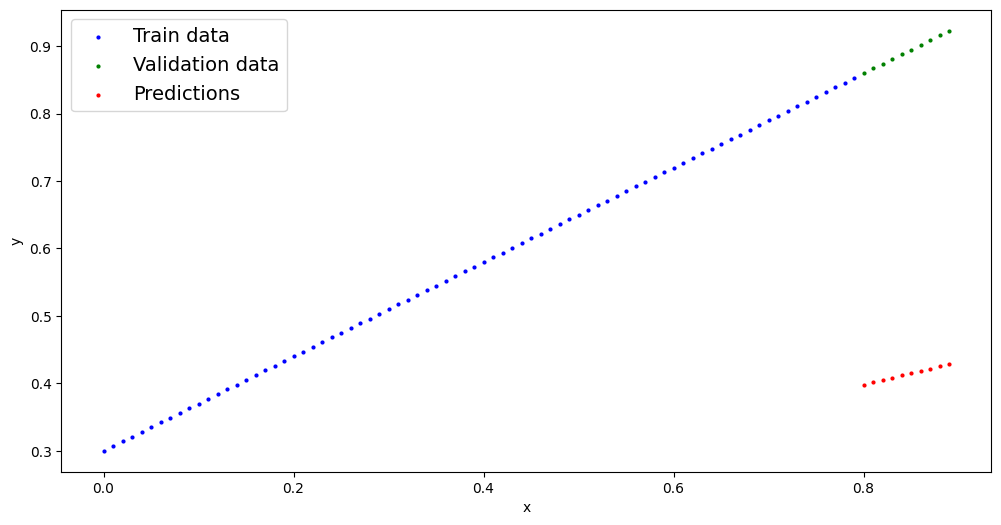

In [572]:
plot_predictions(predictions=y_preds)

# Train Model

In [573]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [574]:
def train_model(
    model: nn.Module,
    X_train: torch.Tensor,
    y_train: torch.Tensor,
    X_validation: torch.Tensor,
    y_validation: torch.Tensor,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    epochs: int = 1000
):
    epoch_count_values = []
    loss_values = []
    validation_loss_values = []

    for epoch in range(epochs):
        model.train() # sets all parameters that have requires_grad=True to train mode

        y_preds = model(X_train) # forward pass

        loss = loss_fn(y_preds, y_train) # compute the loss between the predictions and the target values

        optimizer.zero_grad() # clear the gradients of optimizer (by default the gradients accumulate)

        loss.backward() # perform a backward pass (backpropagation)

        optimizer.step() # by default how the optimizer changes will accumulate through the loop

        if epoch % 100 == 0:
            model.eval() # turns off different settings not needed for evaluation/testing (dropout, batch norm, ...)

            epoch_count_values.append(epoch)
            loss_values.append(loss.item())

            with torch.inference_mode(): # turns off gradient tracking
                y_preds = model(X_validation)

                validation_loss = loss_fn(y_preds, y_validation)

                validation_loss_values.append(validation_loss.item())

            print(f"Epoch: {epoch:03d} | Loss: {loss.item():.4f} | Validation loss: {validation_loss.item():.4f}")
            print(f"Weights: {model.weights.item():.4f}, Bias: {model.bias.item():.4f}")

            plot_predictions(predictions=y_preds)
        
    plt.figure(figsize=(12, 6))
    plt.plot(epoch_count_values, loss_values, label="Training loss")
    plt.plot(epoch_count_values, validation_loss_values, label="Validation loss")

    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

Epoch: 000 | Loss: 0.3147 | Validation loss: 0.4648
Weights: 0.3406, Bias: 0.1388


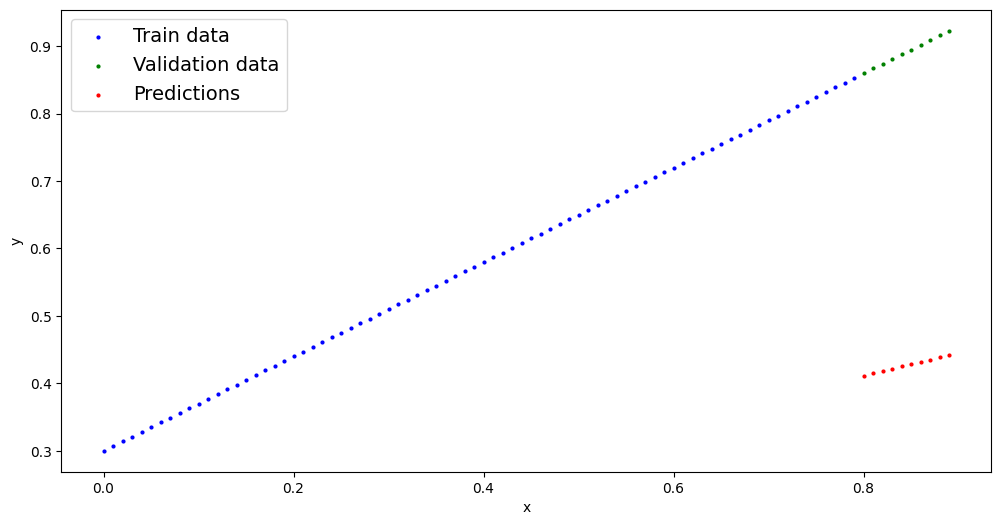

Epoch: 100 | Loss: 0.0243 | Validation loss: 0.0506
Weights: 0.5809, Bias: 0.3501


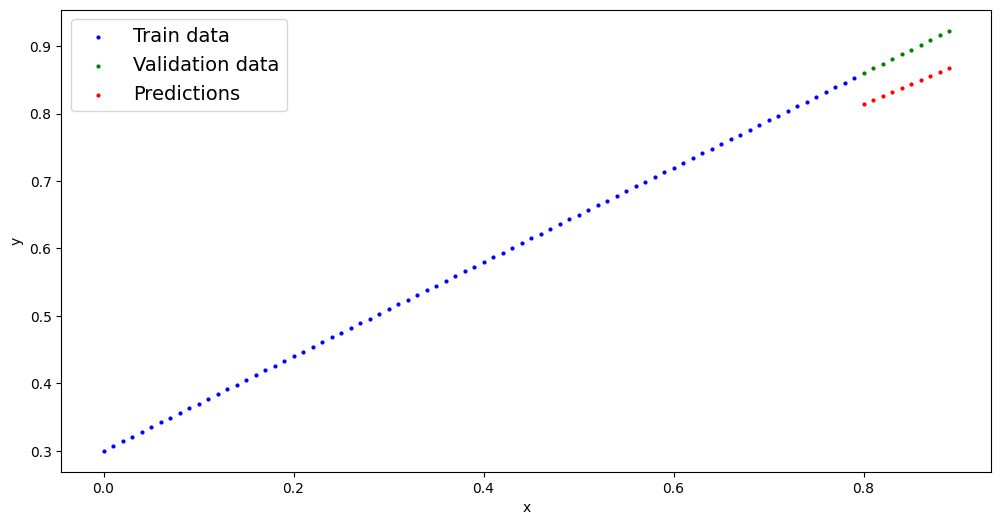

Epoch: 200 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


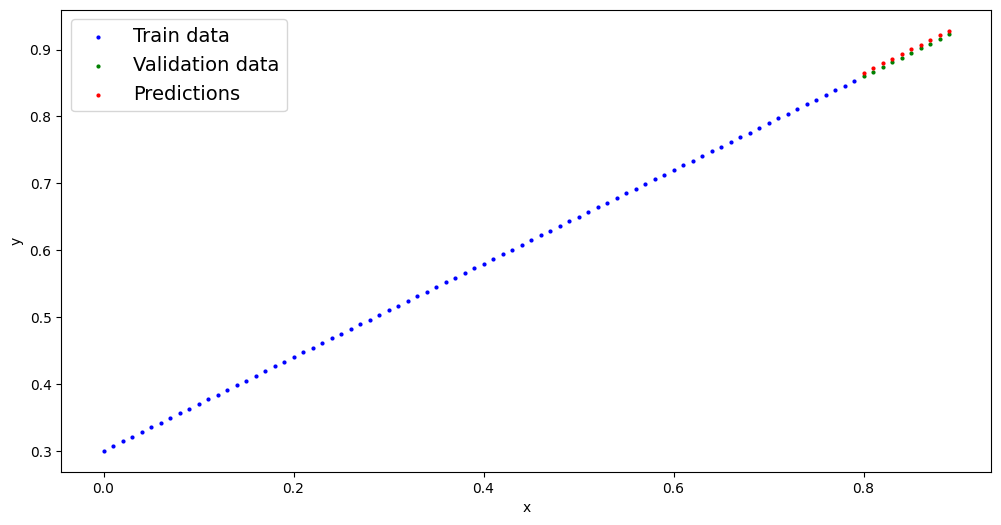

Epoch: 300 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


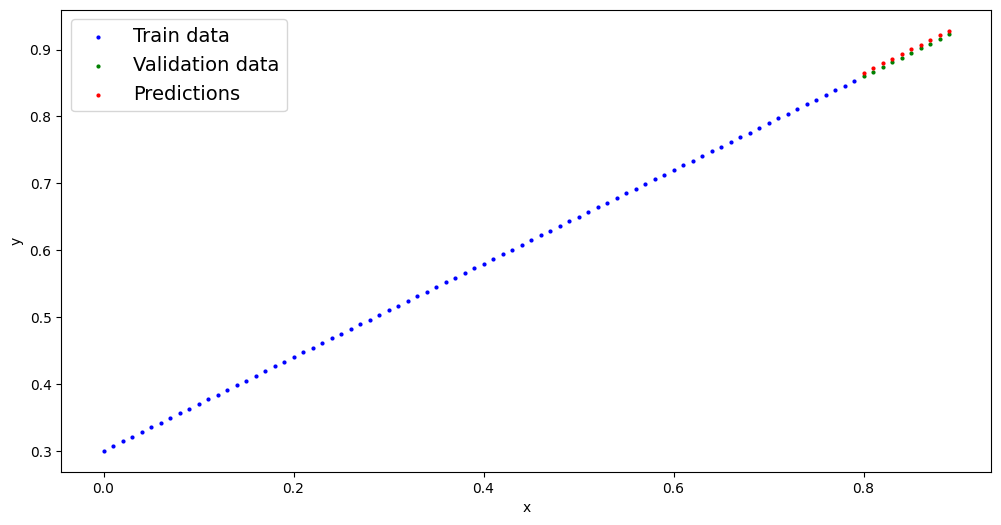

Epoch: 400 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


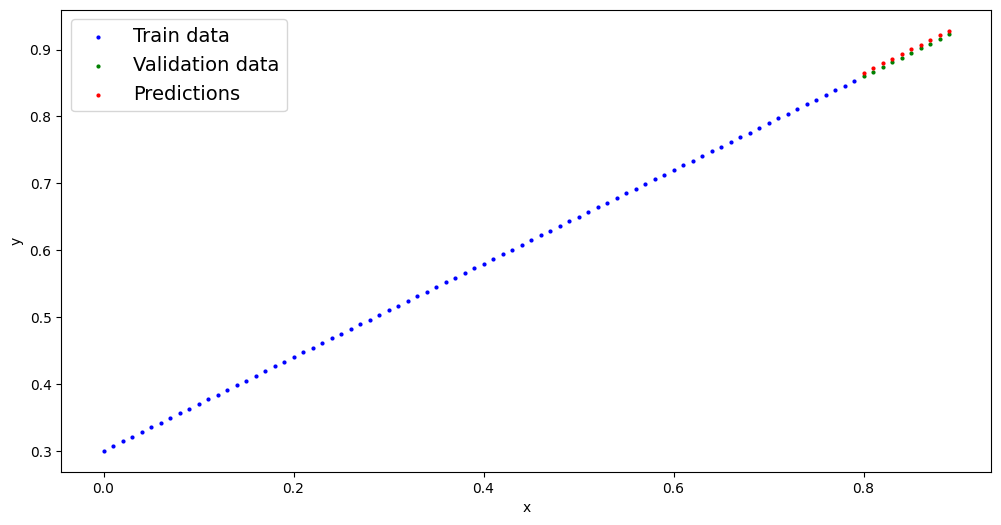

Epoch: 500 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


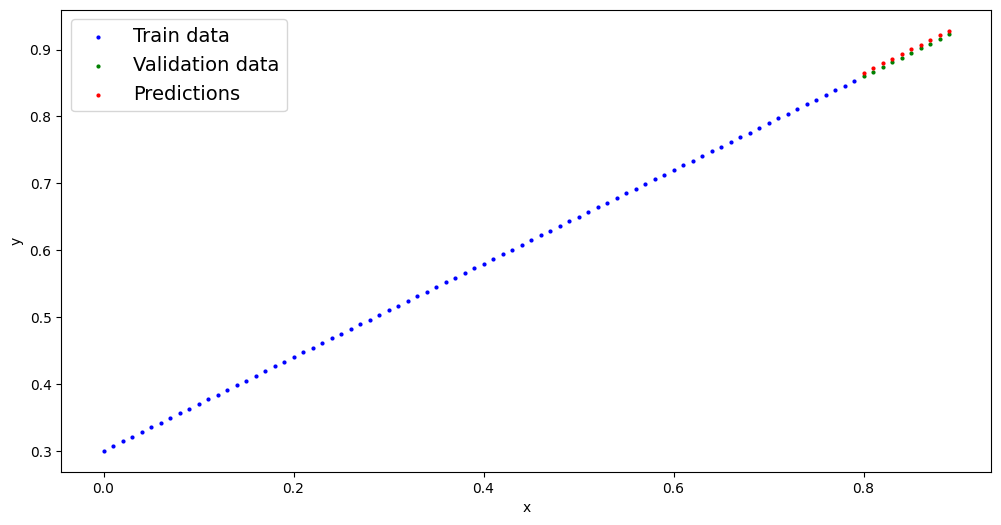

Epoch: 600 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


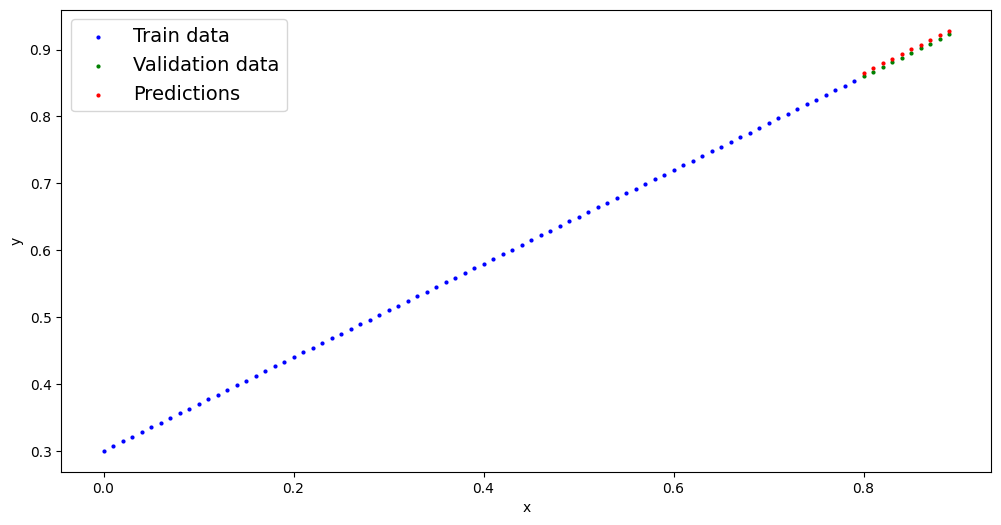

Epoch: 700 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


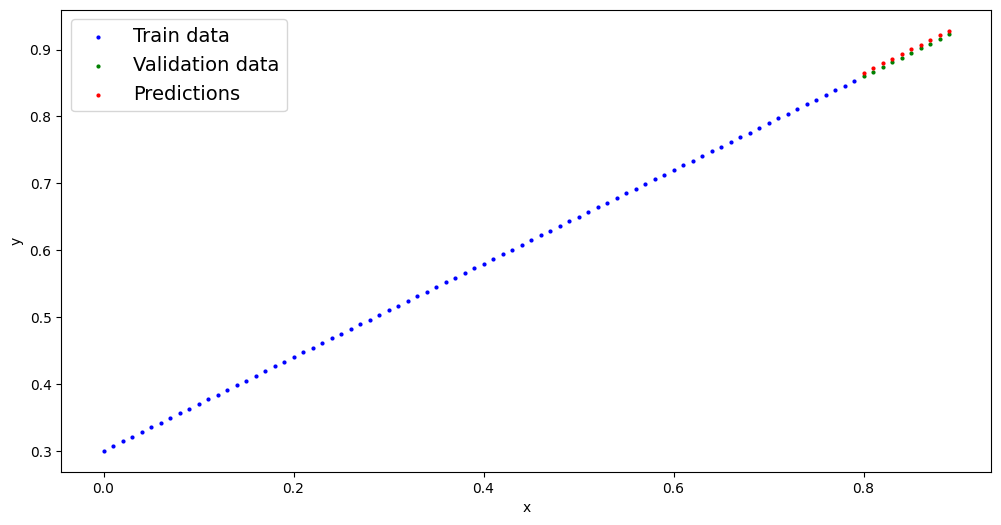

Epoch: 800 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


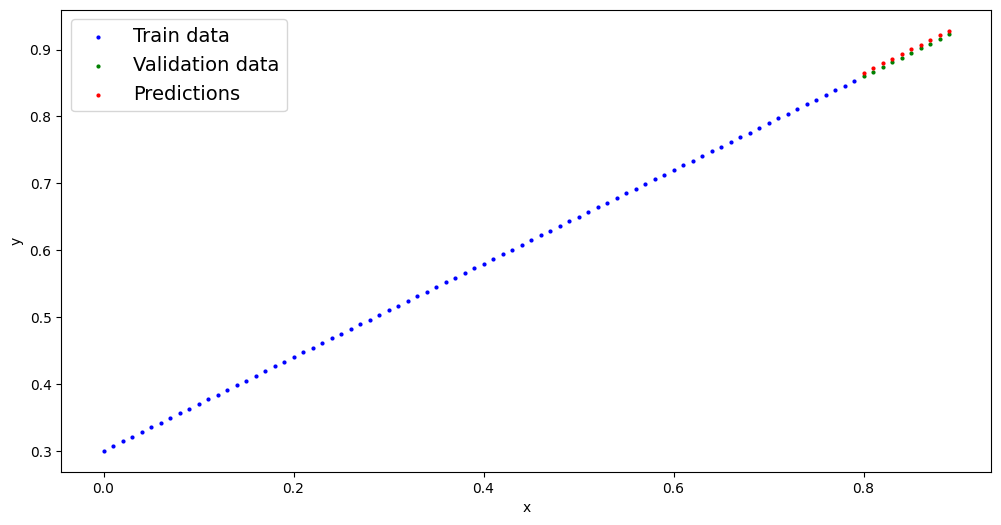

Epoch: 900 | Loss: 0.0054 | Validation loss: 0.0054
Weights: 0.6983, Bias: 0.3068


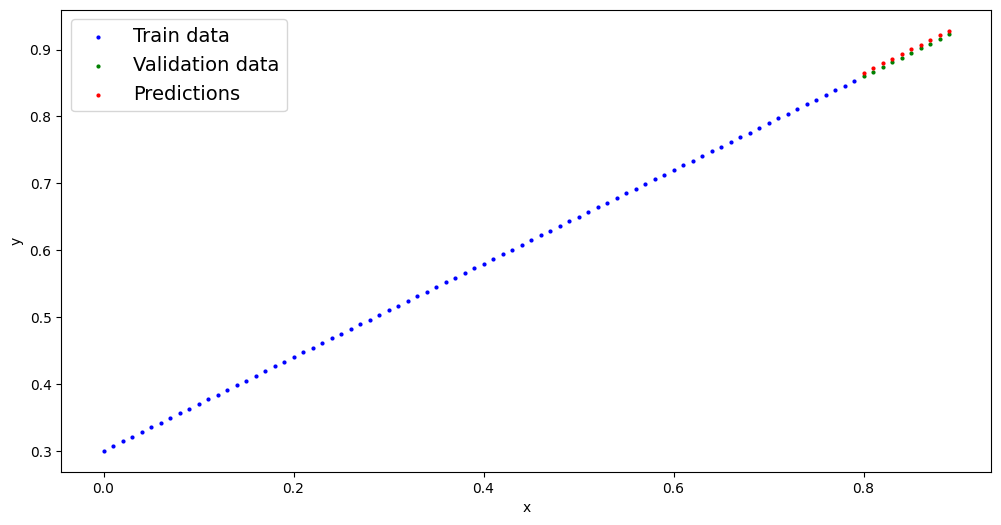

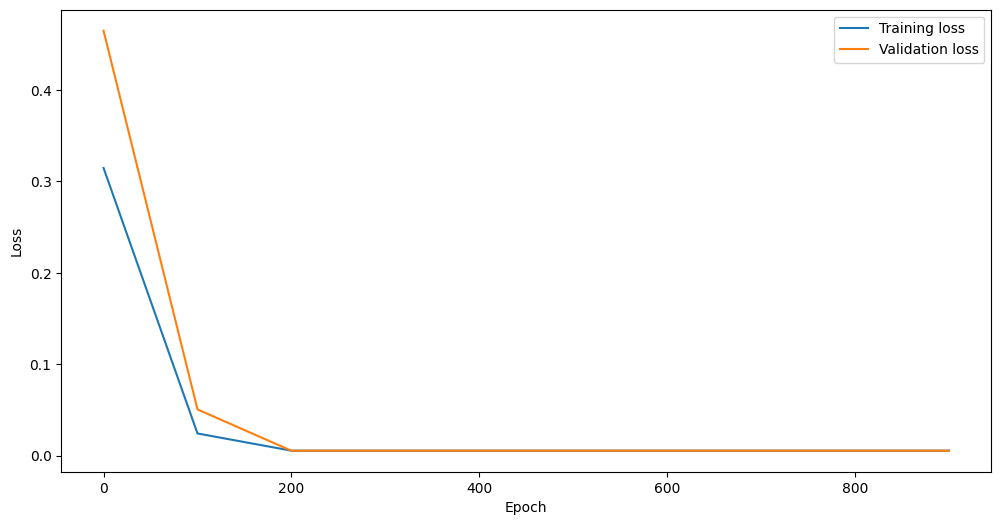

In [575]:
train_model(
    model_0,
    X_train,
    y_train,
    X_validation,
    y_validation,
    loss_fn,
    optimizer,
    epochs=1000
)

In [576]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6944])), ('bias', tensor([0.2968]))])

# Saving Model

In [577]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(exist_ok=True, parents=True)

MODEL_NAME = "03_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/03_workflow_model_0.pth')

In [578]:
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

# Loading Model

In [579]:
!ls -lh models

total 4.0K
-rw-r--r-- 1 matheus matheus 1.6K Oct 22 10:55 03_workflow_model_0.pth


In [580]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6944])), ('bias', tensor([0.2968]))])

In [581]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

/tmp/ipykernel_41251/1497455656.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [582]:
loaded_model_0.eval()
model_0.eval()

with torch.inference_mode():
    loaded_model_0_preds = loaded_model_0(X_validation)
    model_0_preds = model_0(X_validation)

loaded_model_0_preds == model_0_preds

tensor([True, True, True, True, True, True, True, True, True, True])

# Putting it all together

In [583]:
import torch

import matplotlib.pyplot as plt

from torch import nn

In [584]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [585]:
weight = 0.7
bias = 0.3

start = 0
end = 10
step = 0.01

X = torch.arange(start, end, step)
y = weight * X + bias

In [586]:
train_size = int(0.8 * len(X))
validation_size = int(0.1 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]

X_validation = X[train_size:train_size + validation_size]
y_validation = y[train_size:train_size + validation_size]

X_test = X[train_size + validation_size:]
y_test = y[train_size + validation_size:]

In [587]:
len(X_train), len(X_validation), len(X_test)

(800, 100, 100)

In [588]:
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    validation_data=X_validation,
    validation_labels=y_validation,
    predictions=None
):
    plt.figure(figsize=(12, 6))

    plt.scatter(train_data, train_labels, c='b', s=2, label="Train data")
    plt.scatter(validation_data, validation_labels, c='g', s=2, label="Validation data")

    if predictions is not None:
        plt.scatter(validation_data, predictions, c='r', s=2, label="Predictions")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(prop={"size": 14})
    plt.show()

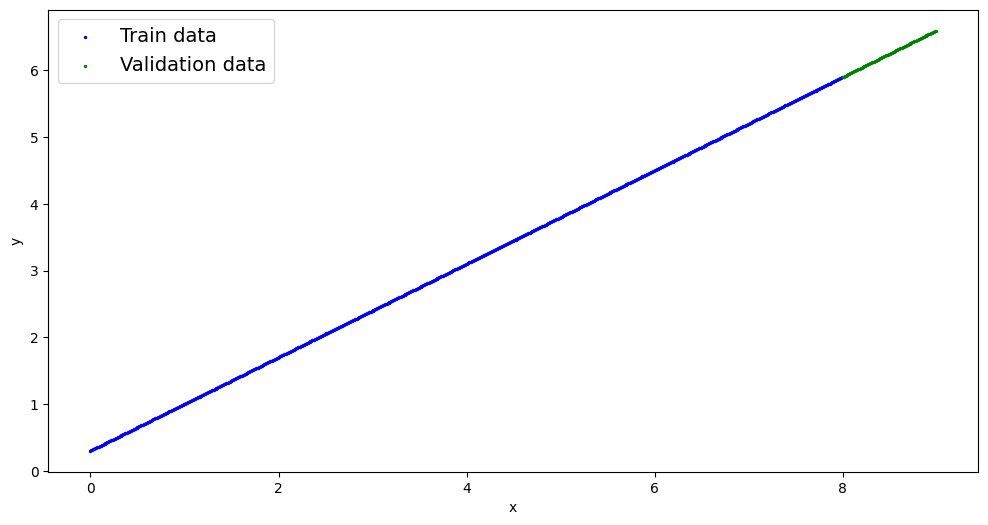

In [589]:
plot_predictions()

In [590]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super(LinearRegressionModelV2, self).__init__()

        self.linear = nn.Linear(
            in_features=1,
            out_features=1,
            bias=True
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear(x)

In [591]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()

list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [592]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [593]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

In [594]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.unsqueeze(1).to(device)
y_train = y_train.unsqueeze(1).to(device)

X_validation = X_validation.unsqueeze(1).to(device)
y_validation = y_validation.unsqueeze(1).to(device)

for epoch in range(epochs):
    model_1.train()

    y_preds = model_1(X_train) # forward pass

    loss = loss_fn(y_preds, y_train) # compute the loss between the predictions and the target values

    optimizer.zero_grad() # clear the gradients of optimizer (by default the gradients accumulate)

    loss.backward() # perform a backward pass (backpropagation)

    optimizer.step() # by default how the optimizer changes will accumulate through the loop

    if epoch % 100 == 0:
        model_1.eval() # turns off different settings not needed for evaluation/testing (dropout, batch norm, ...)

        with torch.inference_mode(): # turns off gradient tracking
            y_preds = model_1(X_validation)

            validation_loss = loss_fn(y_preds, y_validation)

        print(f"Epoch: {epoch:03d} | Loss: {loss.item():.4f} | Validation loss: {validation_loss.item():.4f}")
    

Epoch: 000 | Loss: 0.7878 | Validation loss: 0.9833
Epoch: 100 | Loss: 0.0077 | Validation loss: 0.0066
Epoch: 200 | Loss: 0.0050 | Validation loss: 0.0140
Epoch: 300 | Loss: 0.0082 | Validation loss: 0.0091
Epoch: 400 | Loss: 0.0030 | Validation loss: 0.0111
Epoch: 500 | Loss: 0.0041 | Validation loss: 0.0116
Epoch: 600 | Loss: 0.0076 | Validation loss: 0.0085
Epoch: 700 | Loss: 0.0028 | Validation loss: 0.0106
Epoch: 800 | Loss: 0.0039 | Validation loss: 0.0111
Epoch: 900 | Loss: 0.0074 | Validation loss: 0.0083


In [595]:
model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.7005]], device='cuda:0')),
             ('linear.bias', tensor([0.3009], device='cuda:0'))])

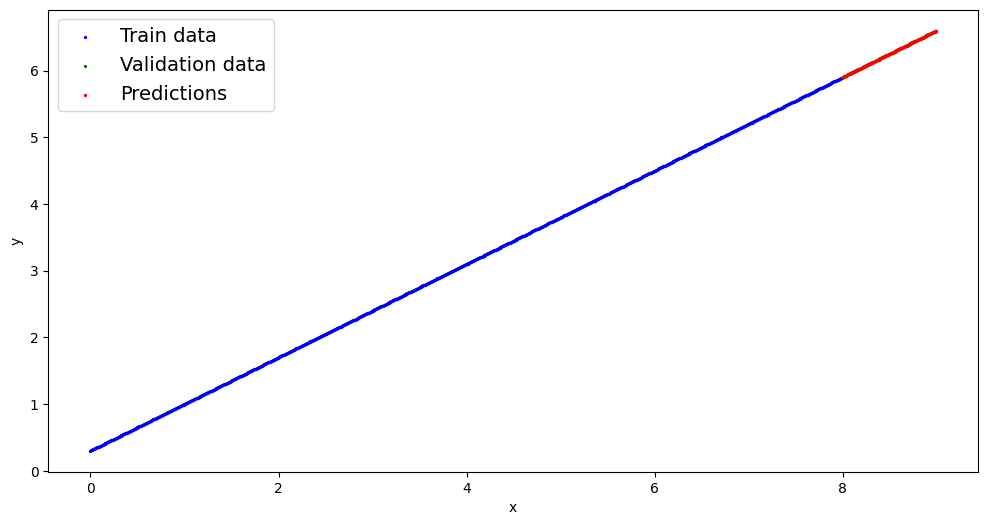

In [596]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_validation)

plot_predictions(predictions=y_preds.cpu())